In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_india = pd.read_excel(r'alldatasets.xlsx',sheet_name='India')

In [3]:
df_india.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,IN011004,India,164.000000,1.0,10.0,0.402029,10.0,13.0,0.0,1,95,4,0.458333,5,1,6000,98.376785
1,IN011006,India,158.199997,0.0,10.0,0.143023,30.0,12.0,0.0,0,95,4,0.097222,5,1,32000,524.676147
2,IN011012,India,157.199997,0.0,16.5,0.276244,10.0,5.0,10.0,0,101,6,0.722222,2,1,0,0.000000
3,IN011013,India,169.500000,0.0,11.0,0.252178,5.0,NaN,12.0,1,98,2,0.814815,5,1,9000,147.565170
4,IN011014,India,162.199997,0.0,7.0,0.394253,NaN,7.0,16.5,0,100,4,0.796296,2,1,72000,1180.521362


In [4]:
df_india.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

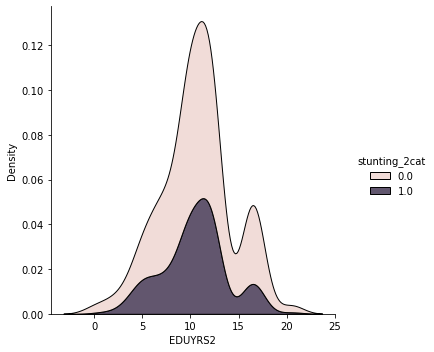

In [6]:
import seaborn as sns
sns.displot(df_india, x="EDUYRS2", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_india[['EDUYRS2']]
X = df_india[['stunting_2cat']]

In [8]:
formula = 'EDUYRS2 ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'EDUYRS2 ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=5.6, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=3.8)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_india, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=5000, chains = 2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 23 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,10.732,0.201,10.359,11.101,0.003,0.002,6290.0,6282.0,6281.0,7226.0,1.0
stunting_2cat,-0.313,0.332,-0.933,0.312,0.004,0.003,6372.0,6278.0,6369.0,7072.0,1.0
sd,3.724,0.114,3.523,3.950,0.001,0.001,8753.0,8749.0,8754.0,6911.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

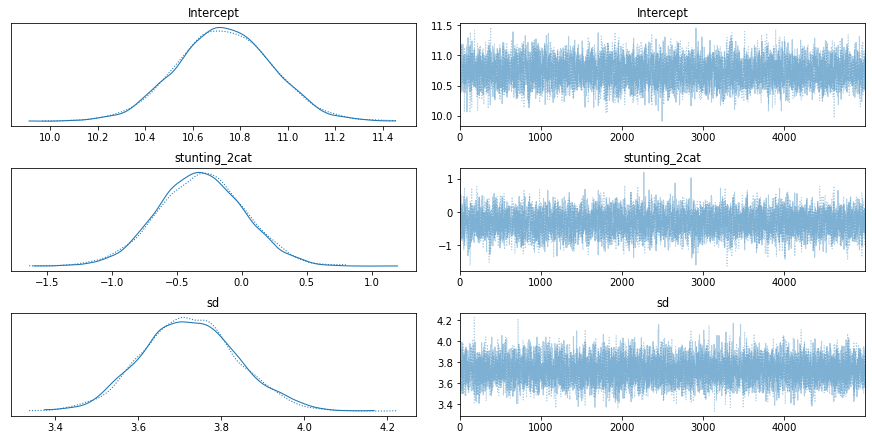

In [12]:
az.plot_trace(normal_trace)

In [13]:
Y = df_india['EDUYRS2']
X = df_india[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [14]:
formula = 'EDUYRS2 ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'EDUYRS2 ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=5.6, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=3.8),
        'agegapr1': pm.Normal.dist(mu=1, sigma=3.8),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=3.8),
        'chsexr1': pm.Normal.dist(mu=1, sigma=3.8),
        'agemonr1': pm.Normal.dist(mu=1, sigma=3.8),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=3.8),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=3.8)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_india, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=1000, chains = 2, tune = 1000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 55 seconds.


In [17]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,8.041,3.644,0.705,14.179,0.098,0.073,1384.0,1260.0,1394.0,1302.0,1.0
stunting_2cat,0.017,0.331,-0.638,0.624,0.007,0.008,1998.0,951.0,2018.0,1396.0,1.0
agegapr1,0.040,0.050,-0.061,0.132,0.001,0.001,2386.0,1072.0,2384.0,1136.0,1.0
momeduyrsr1,0.254,0.058,0.143,0.361,0.002,0.001,1485.0,1420.0,1487.0,1297.0,1.0
chsexr1,0.928,0.325,0.329,1.548,0.007,0.005,2090.0,1875.0,2088.0,1351.0,1.0
agemonr1,0.003,0.038,-0.062,0.079,0.001,0.001,1444.0,1002.0,1449.0,1358.0,1.0
wi_newr1,2.996,0.869,1.289,4.667,0.021,0.015,1706.0,1647.0,1705.0,1352.0,1.0
hhsizer1,0.029,0.076,-0.104,0.170,0.001,0.002,3008.0,786.0,2881.0,1416.0,1.0
sd,3.498,0.108,3.294,3.696,0.002,0.002,2343.0,2341.0,2311.0,1353.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

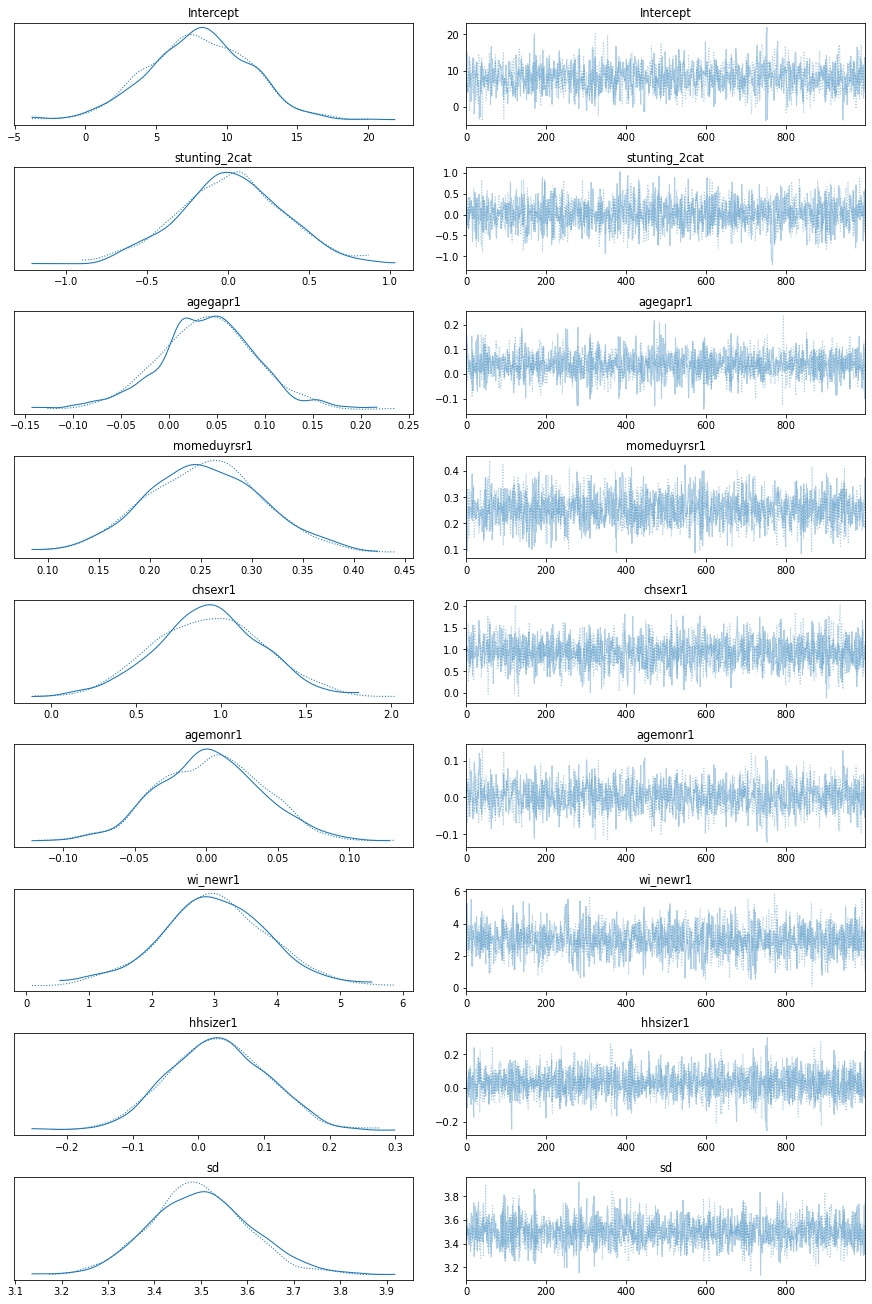

In [18]:
az.plot_trace(normal_trace)

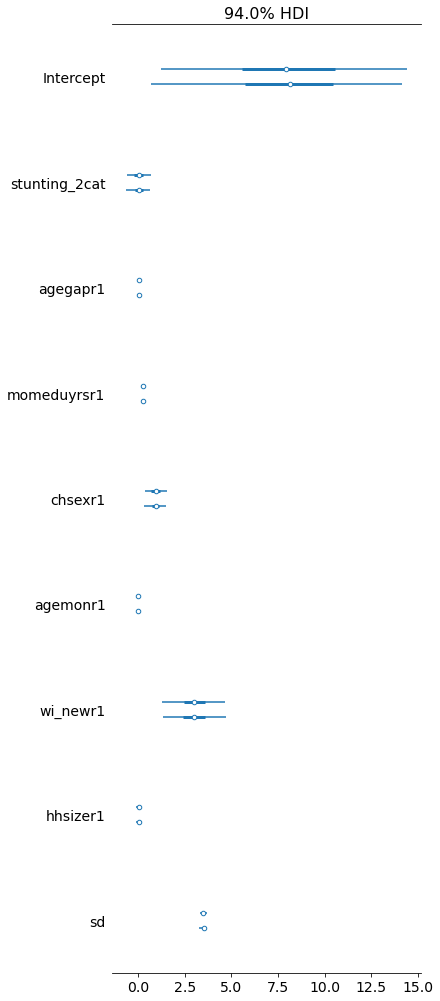

In [19]:
az.plot_forest(normal_trace);